In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Data Load

In [2]:
path_prate = './prate.sfc.mon.mean.nc'
path_uwnd = './uwnd.mon.ltm.nc'
path_vwnd = './vwnd.mon.ltm.nc'
path_omega = './omega.mon.ltm.nc'

prate_nc = xr.open_dataset(path_prate)
uwnd_nc = xr.open_dataset(path_uwnd)
vwnd_nc = xr.open_dataset(path_vwnd)
omega_nc = xr.open_dataset(path_omega)

print(prate_nc)
print(uwnd_nc)
print(vwnd_nc)
print(omega_nc)

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 848)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-08-01
Data variables:
    prate    (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121013
    history:        Mon Jul  5 23:55:54 1999: ncrcat prate.mon.mean.nc /Datas...
    title:          monthly mean prate.sfc from the NCEP Reanalysis
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1
<xarray.Dataset>
Dimensions:             (lat: 73, level: 17, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * level               (level) float32 1000.0 925.0 850.0 ... 30.0 20.0 10.0
  * 

C:\Users\admin\anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
C:\Users\admin\anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: SerializationWarning: Unable

# Data Processing

In [3]:
prate = prate_nc.data_vars['prate']
uwnd = uwnd_nc.data_vars['uwnd']
vwnd = vwnd_nc.data_vars['vwnd']
omega = omega_nc.data_vars['omega']

#(time, level, lat, lon)
print(prate.shape)
print(uwnd.shape)
print(vwnd.shape)
print(omega.shape)

(848, 94, 192)
(12, 17, 73, 144)
(12, 17, 73, 144)
(12, 12, 73, 144)


In [4]:
prate_ltm = prate.groupby("time.month").mean("time")
#Returns a GroupBy object for performing grouped operations.
#DataArray.groupby(group, squeeze=True, restore_coord_dims=None)
#group (str, DataArray or IndexVariable) – 
#Array whose unique values should be used to group this array. 
#If a string, must be the name of a variable contained in this dataset.

#EX) Calculate daily anomalies for daily data:
#da.groupby("time.dayofyear") - da.groupby("time.dayofyear").mean("time")
print(prate_ltm.shape)

(12, 94, 192)


In [5]:
#select level (1000~100mb)
uwnd = uwnd.sel(level=slice(1000,100))
vwnd = vwnd.sel(level=slice(1000,100))
omega = omega.sel(level=slice(1000,100))

In [6]:
#Zonal mean
prate_zm = prate_ltm.mean(dim=['lon'])
uwnd_zm = uwnd.mean(dim=['lon'])
vwnd_zm = vwnd.mean(dim=['lon'])
omega_zm = omega.mean(dim=['lon'])

#print(prate_zm)
#(time, level, lat)
print(prate_zm.shape)

#print(uwnd_zm)
#(time, level, lat)
print(uwnd_zm.shape)

#print(vwnd_zm)
print(vwnd_zm.shape)

#print(omega_zm)
print(omega_zm.shape)


(12, 94)
(12, 12, 73)
(12, 12, 73)
(12, 12, 73)


In [7]:
#scale
prate_zm = prate_zm *86400
#prate units : kg/m^2/s 즉 초 단위. -> 1day = 60*60*24s = 86400s

omega_zm = -omega_zm *1e2
# !!Must put negative sign in front of omega_zm
#since pressure decrease with level.
#omega units : Pascal/s

print(prate_zm)
#check prate_zm data

<xarray.DataArray 'prate' (month: 12, lat: 94)>
array([[0.5067673 , 0.30420776, 0.39968025, ..., 0.68152196, 0.47900659,
        0.21817455],
       [0.45476849, 0.27531226, 0.38484444, ..., 0.67703903, 0.37374237,
        0.15555442],
       [0.44676241, 0.28098663, 0.36178908, ..., 0.7989305 , 0.35628091,
        0.16407798],
       ...,
       [0.65208431, 0.44351645, 0.57041765, ..., 0.75284581, 0.41500106,
        0.15202357],
       [0.493909  , 0.33814909, 0.47006635, ..., 0.66468228, 0.39797262,
        0.16360137],
       [0.50586154, 0.30336576, 0.41004625, ..., 0.71656463, 0.50928725,
        0.28313493]])
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


In [18]:
print(vwnd_zm.sel(time='0001-01')[0])
print(vwnd_zm.sel(time='0001-01'))

#추후 quiver 그릴 때 x components 뭔지 확인하기 위함임. 

<xarray.DataArray 'vwnd' (level: 12, lat: 73)>
array([[ 1.00678336e-02,  6.76651001e-02,  2.22678974e-01,
         3.72574866e-01,  3.38572502e-01,  1.43435895e-01,
         2.10493933e-02,  1.03345715e-01,  2.25602627e-01,
         1.57183647e-01, -5.13950996e-02, -1.01186723e-01,
         1.75213680e-01,  6.11806214e-01,  9.30250704e-01,
         1.03319514e+00,  9.96137202e-01,  8.87625754e-01,
         7.33280838e-01,  6.02790058e-01,  5.79729795e-01,
         6.26741469e-01,  5.81509948e-01,  3.16278547e-01,
        -1.56348765e-01, -7.36455202e-01, -1.32267737e+00,
        -1.84655714e+00, -2.30236721e+00, -2.74971914e+00,
        -3.19453621e+00, -3.45827699e+00, -3.27671456e+00,
        -2.60326099e+00, -1.72655702e+00, -1.00559652e+00,
        -5.48293233e-01, -2.25658998e-01,  7.34914690e-02,
         3.24695230e-01,  4.89510059e-01,  6.21153474e-01,
         7.95206785e-01,  1.00269973e+00,  1.16887093e+00,
         1.24441743e+00,  1.23776209e+00,  1.16523695e+00,
         

# Visualization

Text(0, 0.5, '(mb)')

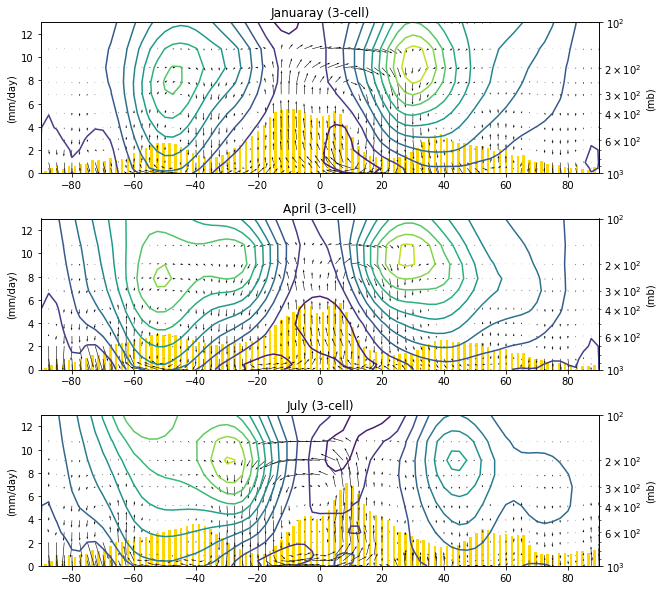

In [19]:
# Set multiple figures
nrow = 3
ncol = 1

fig, ax = plt.subplots(nrows = nrow, ncols = ncol,figsize=(10,10))
plt.subplots_adjust(wspace = 0.2, hspace=0.3)

#1. January

#1-1. prate bar graph
ax[0].bar(prate_zm.lat,prate_zm.sel(month=1),color='gold') #select January
ax[0].set_ylim(0,13)

#1-2. overlap vectors(arrows) on the same axes
ax0 = ax[0].twinx()
#Create a twin Axes sharing the xaxis.

xs_q, ys_q = np.meshgrid(vwnd_zm.lat, vwnd_zm.level)

U= vwnd_zm.sel(time='0001-01')[0] #The x direction components of the arrow vectors.
V= omega_zm.sel(time='0001-01')[0] #The y direction components of the arrow vectors.
ax0.quiver(xs_q,ys_q, U, V, width=0.001, scale=100, color='k')
#quiver([X, Y], U, V, [C], **kw)
#x,y는 arrow가 그려질 좌표. U,V는 그려질 벡터의 x, y 방향 components.
#more info. http://asq.kr/Yrwju0oFB

ax0.invert_yaxis() #invert y axis
ax0.set_yscale('log') #indicate y axis in log scale. 

#1-3. Draw uwind in contour lines. 
ax0.contour(uwnd_zm.lat, uwnd_zm.level, uwnd_zm.sel(time='0001-01')[0], levels=10)

#1-4. Set the title and ylabels.
ax[0].set_title('Januaray (3-cell)')
ax[0].set_ylabel('(mm/day)')
ax0.set_ylabel('(mb)')

#2. April

ax[1].bar(prate_zm.lat, prate_zm.sel(month=4),color='gold')
ax[1].set_ylim(0,13)

ax1=ax[1].twinx()
xs_a, ys_a = np.meshgrid(vwnd_zm.lat, vwnd_zm.level)
U = vwnd_zm.sel(time='0001-04')[0]
V = omega_zm.sel(time='0001-04')[0]
ax1.quiver(xs_a, ys_a, U, V, width=0.001, scale=100, color='k')
ax1.invert_yaxis()
ax1.set_yscale('log')

ax1.contour(uwnd_zm.lat, uwnd_zm.level, uwnd_zm.sel(time='0001-04')[0], levels=10)
ax[1].set_title('April (3-cell)')
ax[1].set_ylabel('(mm/day)')
ax1.set_ylabel('(mb)')

#3. July

ax[2].bar(prate_zm.lat, prate_zm.sel(month=7), color='gold')
ax[2].set_ylim(0,13)

ax2=ax[2].twinx()
xs_j, ys_j = np.meshgrid(vwnd_zm.lat, vwnd_zm.level)
U = vwnd_zm.sel(time='0001-07')[0]
V = omega_zm.sel(time='0001-07')[0]
ax2.quiver(xs_j, ys_j, U, V, width=0.001, scale=100, color='k')
ax2.invert_yaxis()
ax2.set_yscale('log')

ax2.contour(uwnd_zm.lat, uwnd_zm.level, uwnd_zm.sel(time='0001-07')[0], levels=10)
ax[2].set_title('July (3-cell)')
ax[2].set_ylabel('(mm/day)')
ax2.set_ylabel('(mb)')

# Visualization using a function 

In [26]:
def plot_3cell(ax, m=int):
    
    ax.bar(prate_zm.lat, prate_zm.sel(month=m),width=1.5, color='gold')
    ax.set_ylim(0,13)
    
    ax_=ax.twinx()
    xs_q, ys_q = np.meshgrid(vwnd_zm.lat, vwnd_zm.level)
    select_time=''
    
    if m<10:
        select_time = '0001-0'+str(m)
        U=vwnd_zm.sel(time=select_time)
    else :
        select_time = '0001-'+str(m)
    
    U=vwnd_zm.sel(time=select_time)[0]
    V=omega_zm.sel(time=select_time)[0]
    
    ax_.quiver(xs_q, ys_q, U, V, width=0.001, scale=100, color='k')
    ax_.invert_yaxis()
    ax_.set_yscale('log')
    
    ax_.contour(uwnd_zm.lat, uwnd_zm.level, uwnd_zm.sel(time=select_time)[0], levels=10)
    
    ax.set_title('3 cell, month={0}'.format(m))
    ax.set_ylabel('(mm/day)')
    ax_.set_ylabel('(mb)')

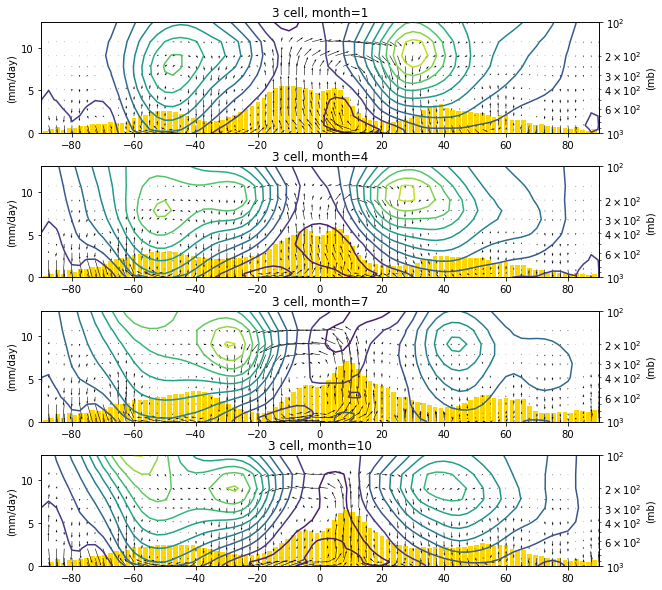

In [35]:
nrow = 4
ncol = 1
fig, ax = plt.subplots(nrows = nrow, ncols = ncol,figsize=(10,10))
plt.subplots_adjust(wspace = 0.2, hspace=0.3)

count = 0

for i in range(1,13,3):
    plot_3cell(ax[count],i)
    count+=1

Input the start month in number (between Januaray~march) :1


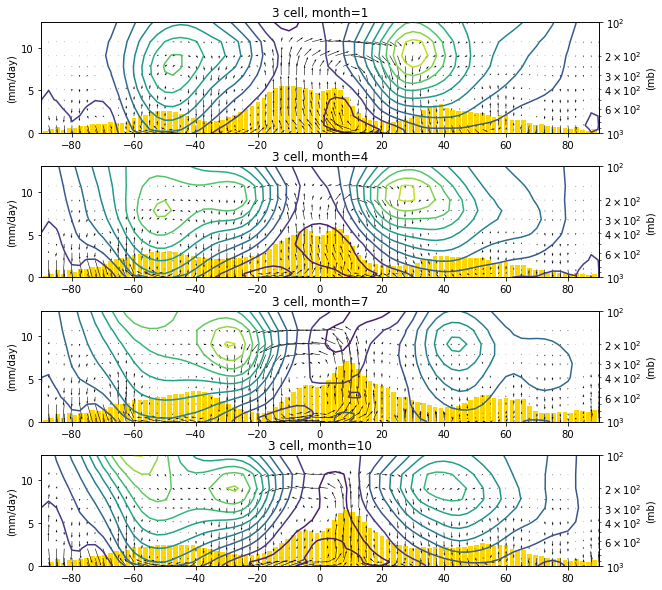

In [39]:
#직접 시작 달 입력받기. 
nrow = 4
ncol = 1
fig, ax = plt.subplots(nrows = nrow, ncols = ncol,figsize=(10,10))
plt.subplots_adjust(wspace = 0.2, hspace=0.3)

count = 0
start_month = int(input('Input the start month in number (between Januaray~march) :'))

for i in range(start_month,13,3):
    plot_3cell(ax[count],i)
    count+=1